<center>

# <font size="2000"><b>Support Vector Machine</b></font><br><br>
    
</center>


**SVM** is a supervised learning method that looks at data and sort it into one of the two categories.

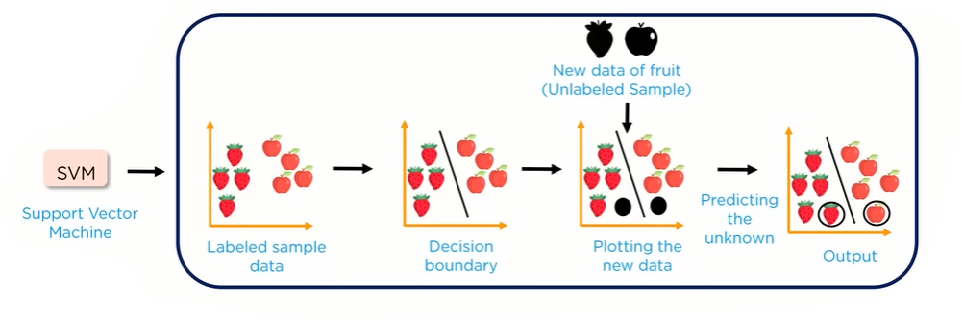

Source: simple learn


<h2>Example</h2>

We are given a set of people (men & women) with different height and weight. We put the data on a graph and we see 2 groups based on the height vs weight.

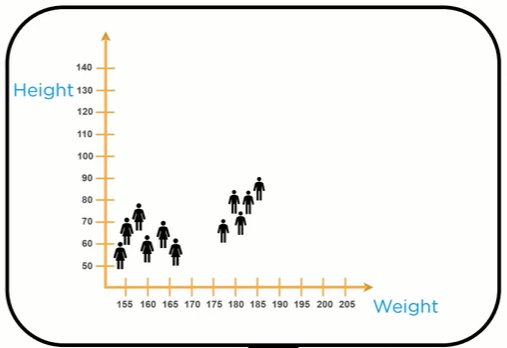

In this example we can split our data by choosing any of these lines but the question is which one? line 1 or 2 ?

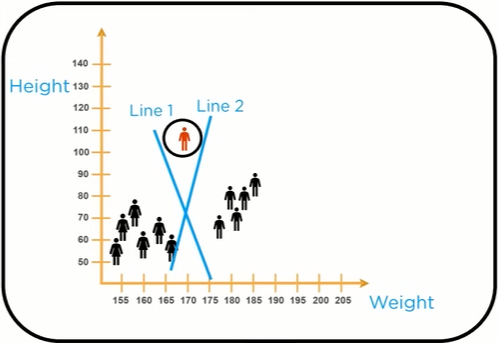

Line 1 is better beacuse it has the maximum space that separates the two classes. 

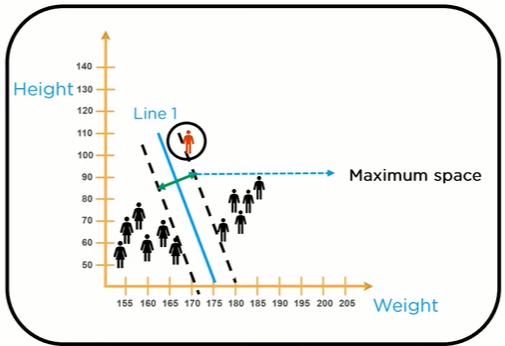

While the other line doesn't have the maximum space that separates the two classes. 

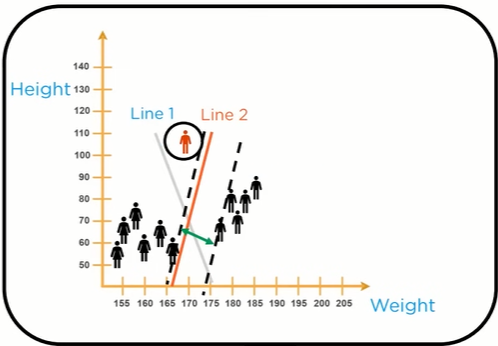

The distance between the support vector and the hyperlane should be as far as possible. 

**Support vectors** are the extreme points in the datasets and hyperplane has the support vectors of any class

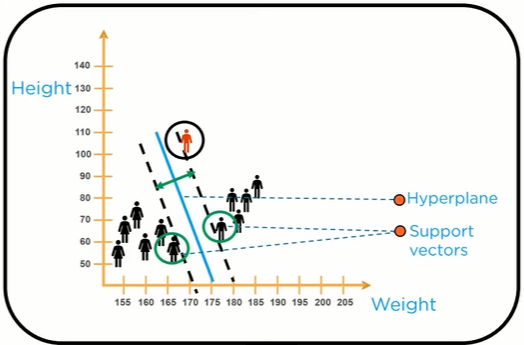

**D+** is the shortest distance to the closest positive point. **D-** is the shortest distance to the closest negative point. Sum of D+ and D- is called the **Distance Margine**. 

From the distance margin, we get optimal hyperplane and based on the hyperlane, we can say the new data point belongs to male gender

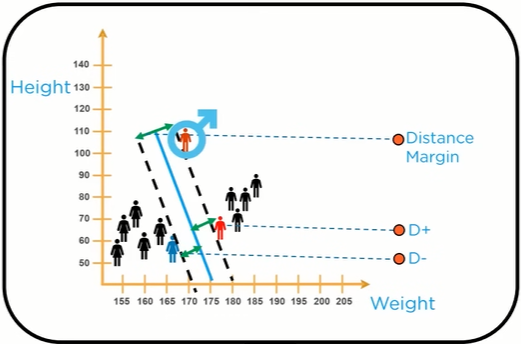

What if our sample dataset was 1 dimension like below diagram? (Red dots shows patients with low and large usage of drug that were not cured but green dots are paients with right dosage)

We can not use a hyperplane here in 1D data. 

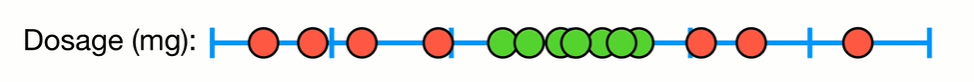

We need to transfer 1D data to 2D. We use **Kernel** function to do that. Kernel creates a y axis by squaring x dot ($y = x^2$)

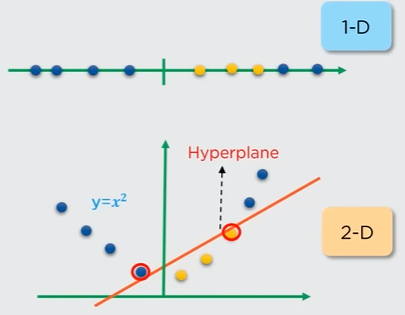

How to perform SVM for this type of data?

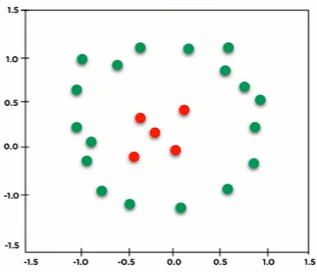

It is clear there would be no optimal hyperlane. So we need to transfer the 2D to 3D by using the kernel. 

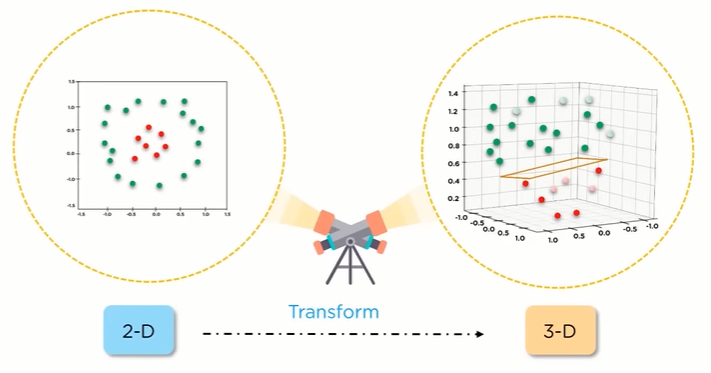

<h2>SVM Application</h2>

- Face detection
- Text and Hypertext categorization
- Classification of image
- Bioinformatics 

<h1>SVM in Python</h1>

Import Libraries

In [26]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as colors 
from sklearn.utils import resample 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA

In [27]:
pip install xlrd # to read excel file

Note: you may need to restart the kernel to use updated packages.


<a id='Import-Data'></a>
<h2>Import Data</h2>

We load the dataset from the [UCI Machine Learning Repository](https://archive-beta.ics.uci.edu/dataset/350/default+of+credit+card+clients). 

In [28]:
df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls',header = 1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


**Attribute Information:**

- **ID**, The ID number assigned to each customer
- **LIMIT_BAL**, Credit limit
- **SEX**, Gender
- **EDUCATION**, level of education
- **MARRIAGE**, Material status
- **AGE**, Age
- **PAY_**, When the last 6 bills were paid
- **BLL_AMT**, What the last 6 bills were
- **PAY_AMT**, How much the last payments were 
- **default payment next month**

NOTE: The last column name, '**default payment next month**', is long. We change it to '**default**'. 

In [29]:
df.rename({'default payment next month' : 'DEFAULT'}, axis = 'columns', inplace = True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Also, the values in the ID column were randomly assigned, making it uninformative, so we can drop it.

In [30]:
df.drop('ID', axis=1, inplace=True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Cheking the data type

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_0      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

Let's start by making sure **SEX** only contains the number 1 and 2. 

In [32]:
df['SEX'].unique()

array([2, 1])

Let's look at the **EDUCATION** and make sure it only contains 1,2,3, and 4.


In [33]:
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0])

So, for reason unknown, in addition to allowed numbers, 1,2,3,4 **EDUCATION** also contains 0,5 and 6. it is possible that 0 represents missing data and 5 and 6 represent categories not mentioned in the specification, but that is just a guess. 

Now let's look at **MARRIGE** and make sure it only contains 1,2,3

In [34]:
df['MARRIAGE'].unique()

array([1, 2, 3, 0])

like **education**, **marriage** contains 0, which may represent missing data. 

<a id='miss'></a>
<h2> Missing Data: Dealing With Missing Data </h2>


SVMs do not support datasets with missing values. lets see how many rows contaon missing data.

In [35]:
len(df.loc[(df['EDUCATION'] == 0) | (df['MARRIAGE'] == 0)])

68

So, Only **68** rows have missing values. lets see the total number of rows in the dataset.

In [36]:
len(df)

30000

So **68** of the **30,000** rows or less than **1%** contain missing values. Since that still leaves us with more data than we need for a SVM, will remove the rows with missing values. 

In [37]:
df_no_missing = df.loc[(df['EDUCATION'] != 0) & (df['MARRIAGE'] !=0)]
len(df_no_missing)

29932

Making sure EDDUCATION and MARRIAGE no longer contains 0s. 

In [38]:
df_no_missing['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6])

In [39]:
df_no_missing['MARRIAGE'].unique()

array([1, 2, 3])

<a id='ds'></a>
<h2> Downsample the data </h2>

**29,932** samples is a relatively large number for SVM. **SVM** is great with small datasets, but not awesome with large ones, and this datase, while not huge, is big eanough to take a long time to optimize with **Cross Validation**. So we'll downsample both categories, customers who did and did not default to 1,000 each. 

To make sure we get 1,000 of each category, we start by spiliting the data into 2 **dataframes**, one for people that did not default and one for people that did. 

In [41]:
df_no_default = df_no_missing[df_no_missing['DEFAULT'] == 0]
df_default = df_no_missing[df_no_missing['DEFAULT'] == 1]

Now downsample the dataset that did not default...

In [42]:
# the resample function from the scikit-learn library to downsample a DataFrame
df_no_default_downsampled = resample(df_no_default, 
                                    replace = False, # set to False to ensure no dublicate 
                                    n_samples = 1000, # number of sample
                                    random_state = 42) # to ensure reproducibility of the resampling results
len(df_no_default_downsampled)

1000

Now downsample the dataset that defaulted ...

In [43]:
df_default_downsampled = resample (df_default,
                                 replace = False,
                                 n_samples = 1000,
                                 random_state = 42)
len(df_default_downsampled) 

1000

Merge the two downsample dataset

In [44]:
df_downsample = pd.concat([df_no_default_downsampled, df_default_downsampled])
len(df_downsample)

2000

<h2> Format Data Part 1: Split the Data into Dependent and Independent Variables</h2>

Now we are ready to start formating the data for making a **SVM**.

The first step is to split the data into two parts:

1. The columns of data that we will use to make classifications
2. The column of data that we want to predict



In [45]:
X = df_downsample.drop('DEFAULT', axis=1).copy()
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
641,130000,2,3,1,28,0,0,0,0,-2,...,50000,0,0,0,2500,1000,0,0,0,0
4678,170000,1,3,1,29,0,0,0,0,0,...,172307,35234,32869,33862,7200,7500,1200,1200,1500,1300
16004,180000,2,2,1,29,0,0,0,0,0,...,26310,26662,26166,26176,1800,1800,1500,1056,950,1000
22974,210000,2,2,2,32,-2,-2,-2,-2,-2,...,410,0,0,0,979,412,0,0,0,0
17535,190000,2,3,1,45,0,0,0,0,0,...,80548,81778,83082,84811,3300,3331,3359,2663,2751,3000


In [46]:
y = df_downsample['DEFAULT'].copy()
y.head()

641      0
4678     0
16004    0
22974    0
17535    0
Name: DEFAULT, dtype: int64

Now that we created **X**, which has the data we want to use to make predictions, and **y**, which has the data we want to predict, we are ready to continue formatting **X** so that it is suitable for making a **SVM**. 

<a id='format'></a>
<h2>Format the Data Part 2: One-Hot Encoding</h2>

Now that we have split the data frame into two pieces, X, which contains the data we will use to make, or predict, classifications, and y, which contains the known classifications in our training dataset, we need to take a closer look at the variables in X. The list below tells us what each variable represents and the type of data (**Int** or **Categorical**) it should contain: 


So it looks like **SEX, EDUCATION, MARRIAGE** and **PAY_** are supposed to be categorical and need to be modified. This is because, while **scikit learn SVM** natively support continuous data, like **LIMIT_BAL** and **AGE**, they do not natively support categorical data, like **MARRIAGE**, which contains **3** different categories. Thus, in order to use categorical data with **scikit learn SVM**, we have to use a trick that converts a column of categorical data into multiple columns of binary values. This trick is called **One-Hot Encoding**.

First, before we commit to converting columns with **One-Hot Encoding**, let's just see what happens when we convert **MARRIAGE** without saving the results. This will make it easy to see how <mark>get_dumies()</mark> works. 

In [47]:
pd.get_dummies(X, columns = ['MARRIAGE']).head()

,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
641,130000,2,3,28,0,0,0,0,-2,-2,...,0,2500,1000,0,0,0,0,1,0,0
4678,170000,1,3,29,0,0,0,0,0,0,...,33862,7200,7500,1200,1200,1500,1300,1,0,0
16004,180000,2,2,29,0,0,0,0,0,0,...,26176,1800,1800,1500,1056,950,1000,1,0,0
22974,210000,2,2,32,-2,-2,-2,-2,-2,-2,...,0,979,412,0,0,0,0,0,1,0
17535,190000,2,3,45,0,0,0,0,0,0,...,84811,3300,3331,3359,2663,2751,3000,1,0,0


As we can see <mark>get_dummies()</mark> puts all of the columns it does not proccess on the left side and it puts **MARRIAGE** on the right side. It also splits **MARRIAGE** into **3** columns, just like we expected. **MARIAGE_1** is **1** for any person that had a **1** for **MARRIAGE** and **0** for all other customers. **MARRIAGE_2** is 1 for anyone that had a 2 for **MARRIAGE** and 0 for all other customers. Lastly, **MARRIAGE_3** is 1 for anyone with a 3 for **MARRIAGE** and 0 for all other customers. 

Now that we see how <mark>get_dummies()</mark> works, let's use it in the categorical columns and save the result. 

**NOTE:** in a real situation (not a tutorial like this), you should verify all 5 of these columns to make sure thay only contain the accepted categories. 

In [48]:
X_encoded = pd.get_dummies(X, columns = ['SEX',
                                       'EDUCATION',
                                       'MARRIAGE',
                                       'PAY_0',
                                       'PAY_2',
                                       'PAY_3',
                                       'PAY_4',
                                       'PAY_5',
                                       'PAY_6'])
X_encoded.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
641,130000,28,100143,50456,50000,0,0,0,2500,1000,...,0,1,0,0,0,0,0,0,0,0
4678,170000,29,165027,168990,172307,35234,32869,33862,7200,7500,...,0,0,0,1,0,0,0,0,0,0
16004,180000,29,25781,26000,26310,26662,26166,26176,1800,1800,...,0,0,0,1,0,0,0,0,0,0
22974,210000,32,355,975,410,0,0,0,979,412,...,0,1,0,0,0,0,0,0,0,0
17535,190000,45,76433,78472,80548,81778,83082,84811,3300,3331,...,0,0,0,1,0,0,0,0,0,0


<h2> Format the Data Part 3: Centering and Scaling</h2>

The **Radial Basis Function (RBF)** that we are using with our **SVM** assumes that the data are centered and scaled. In other words, each column should have a mean value = 0 and a standard deviation = 1. So we need to do this to both the training and testing datasets. 

**NOTE:** We split the data into training and testing datasets and then scale them separately to avoid **Data Leakage**. Data leakage occurs when information about the training dataset currupts or influence the testing dataset. 

In [49]:
x_train, x_test, y_train, y_test = train_test_split(X_encoded, y, random_state = 42)
x_train_scaled = scale(x_train)
x_test_scaled = scale(x_test)

<a id='build'></a>
<h2> Build A Preliminary Support Vector Machine </h2>

In [50]:
clf_svm = SVC(random_state = 42) #create model
clf_svm.fit(x_train_scaled, y_train) #fit the train data into model


SVC(random_state=42)

OK, we've built a **SVM** for classifiction. Let's see how it performs on the **Testing Dataset** and draw a **Confusion Matrix**. 

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


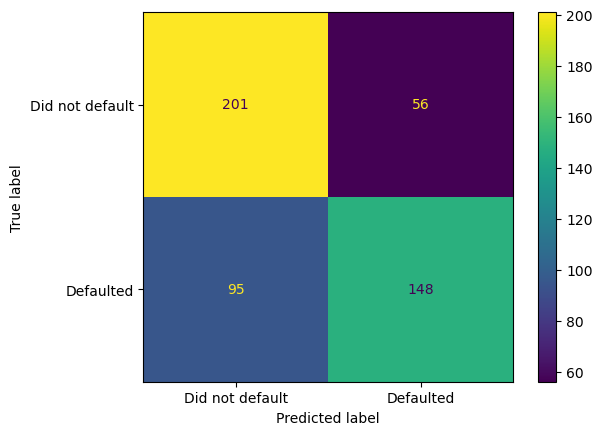

In [51]:
plot_confusion_matrix(clf_svm,
                    x_test_scaled,
                    y_test,
                    values_format = 'd',
                    display_labels=['Did not default', 'Defaulted'])

In the confusion matrix, we see that of the **257** people that did not default, **201 (79%)** were correctly classified and of the **243 (61%)** were correctly classified. So the **SVM** was not awesome. So let's try to improve predictions using **Cross Validation** to optimize the parameters. 

<a id='cv'></a>
<h2> Optimize Parameters with Cross Validation and GridSearchCV()</h2>

Optimizing a **SVM** is all about finding the best value for **gamma**, and potentially, the regularization paremeter, **C**, So let's see if we find better parameters values using cross validation in hope that we can improve the accuracy with the **Testing Dataset**.

Since we have two parameters to optimize, we will use <mark>GridSearchCV()</mark> tests all possible combinations of parameters for us. 

In [52]:
param_grid = [ 
    {'C': [0.5, 1, 10, 100], # NOTE: values for C must be >0
    'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']}, 
]
## NOTE: we are including C=1 and gamma = 'scale'
## as possible choices since they are the default values. 

optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv=5, # number of folds in cross validation 
    scoring = 'accuracy',
    verbose=0
)

optimal_params.fit(x_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


And we see that the ideal value for **C** is **100**, which means we will use regularization, and the ideal value for **gamma** is **0.001**.

<a id='final'></a>
<h2>Building, Evaluating, Drawing, and Interperting the Final SVM </h2

Now that we have the ideal value for C and gamma we can build the final SVM. 

In [53]:
clf_svm = SVC(random_state = 42, C=100, gamma = 0.001)
clf_svm.fit(x_train_scaled, y_train)

SVC(C=100, gamma=0.001, random_state=42)

Now, let's draw another confusion matrix to see if the optimized SVM does better. 

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


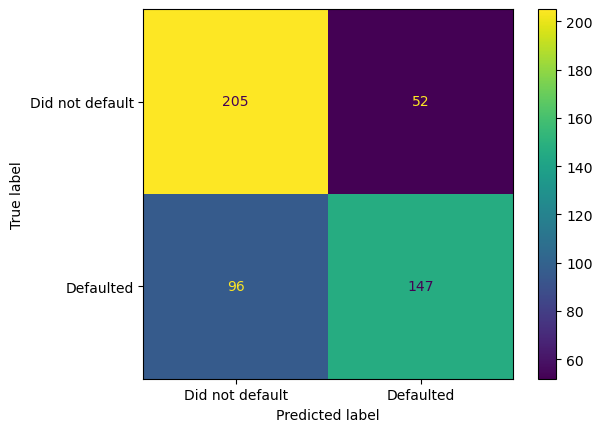

In [54]:
plot_confusion_matrix(clf_svm,
                     x_test_scaled,
                     y_test,
                     values_format = 'd',
                     display_labels = ['Did not default','Defaulted'])

And the results from the *potimized* **SVM** are just a little bit better than before. **4** more people were correctly classified as not defaulting and only **1** more person was *incorrectly* classified as defaulting. 

In other words, the **SVM** was pretty good straight out of the box without much optimization. This makes **SVMs** a great, quick and dirty method for relatively small datasets. 

**NOTE:** Although classification with this dataset and an **SVM** is not awesome, it may be better than other methods. We'd have to compare to find out. 

The last thing we are going to do is draw a SVM boundary and discuss how to interpert it. 

The first thing we need to do is count the number of columns in **X**:

In [55]:
len(df_downsample.columns)

24

So we see that there are **24** features, or columns, in **X**. This is a problem because it would require a 24-dimesional graph, one dimension per feature used to make predictions, to plot the data in its raw form. If we wanted to, we could just pick two features at random to use as x and y-axes on our graph. but instead, we will use **PCA (Principle CComponent Analysis)** to combine the **24** features into **2** orthogonal meta-features that we can use as axes for graph. PCA is a way to shirink a 24-dimensional graph into a 2-dimensional graph. 

However, before we shirink the graph, let's first determine how accurate the shrunken graph will be. If it's relatively accurate, than it makes sense to draw the 2-Dimensional graph. If not, the shrunken graph will not be very useful. We can determine the accuracy of the graph by drwing something called a **scree plot**.  

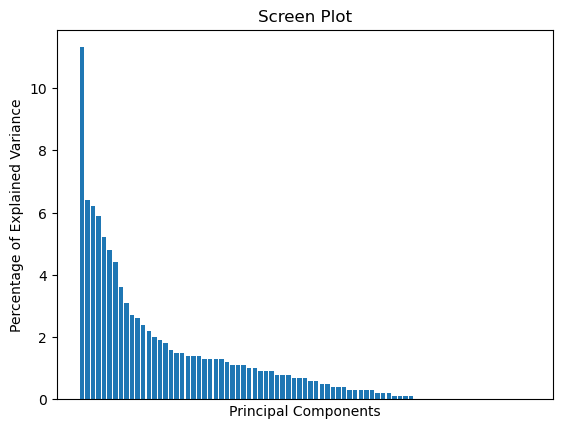

In [56]:
pca = PCA() #Note: by default, PCA() centers the data, but does not scale it. 
x_train_pca = pca.fit_transform(x_train_scaled)

per_var = np.round(pca.explained_variance_ratio_ * 100, decimals = 1)
labels = [str(x) for x in range (1, len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height = per_var)
plt.tick_params(
    axis = 'x',        # changes apply to the x-axis 
    which = 'both',    # both major and minor ticks are affected
    bottom = False,    # ticks along the bottom edge are off
    top = False,       # ticks along the top edge are off
    labelbottom=False # labels along the bottom edge are off
    )

plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Screen Plot')
plt.show()

The screen plot shows that the first principal component, PC, accounts for a relatively large amount of variation in the raw data, and this means that it will be a good candidate for the x- axis in the 2-dimensional graoph. However, PC2 is not much different PC3 or PC4, which doesn't bode well for dimension reduction. Since we don't have a choice, let's go with it. 

Now we will draw the PCA graph.
First, let's optimize an SVM fit to PC1 and PC2.


In [57]:
train_pc1_coords = x_train_pca[:, 0]
train_pc2_coords = x_train_pca[:, 1]

## NOTE:
## pc1: contains the x_axis coordinates of the data after PCA
## pc2: contains the y_axis coordinates of the data after PCA

## Now center and scale the PCs...
pca_train_scaled = scale(np.column_stack((train_pc1_coords, train_pc2_coords)))

## now we optimize the SVM fit to the x and y_axis coordinates
## of the data after PCA dimension reduction...

param_grid = [{'C': [1,10,100,1000],
              'gamma': ['scale', 1, 0.1, 1.01, 0.001, 0.0001],
               'kernel': ['rbf']},
             ]

optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv=5, # number of folds in cross validation 
    scoring = 'accuracy',
    verbose=0 # Note: if u want to see what Grid Search is doing, set verbose = 2
)

optimal_params.fit(pca_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


Now that we have optimal values for **C** and **gamma**, lets draw the graph:

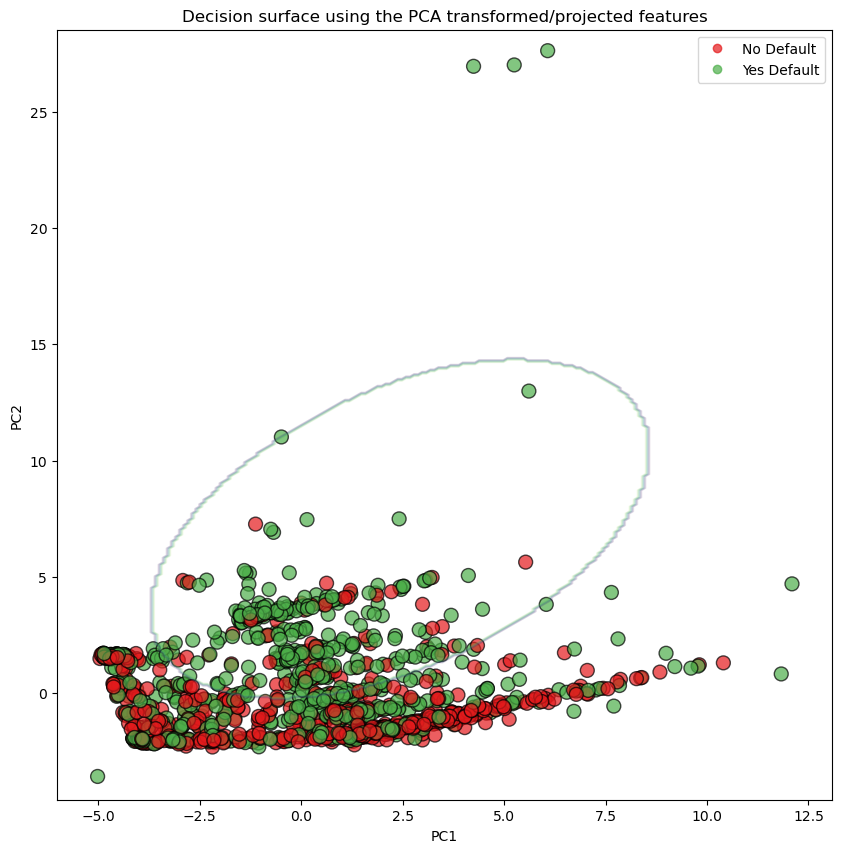

In [58]:
clf_svm = SVC(random_state = 42, C=1000, gamma = 0.001)
clf_svm.fit(pca_train_scaled, y_train)

## Transform the test dataset with the PCA...
x_test_pca = pca.transform(x_train_scaled)
#x_x_test_pca = pca.transform(x_test_scaled)
test_pc1_coords = x_test_pca[:, 0]
test_pc2_coords = x_test_pca[:, 1]

## Now create a matrix of points that we can use to show 
## the decision regions. 
## The matrix will be a little bit larger than the
## transformed PCA points so that we can plot all of 
## the PCA points on it without them being on the edge 

x_min = test_pc1_coords.min() - 1
x_max = test_pc1_coords.max() + 1

y_min = test_pc2_coords.min() - 1
y_max = test_pc2_coords.max() + 1 

xx, yy = np.meshgrid(np.arange(start=x_min, stop=x_max, step=0.1),
                    np.arange(start=y_min, stop=y_max, step=0.1))

## now we will classify every point in that 
## matrix with the SVM. Points on one side of the 
## clasification boundry will get 0, and points on the other 
## side will get 1. 
z = clf_svm.predict(np.column_stack((xx.ravel(), yy.ravel())))
## Right now, z is a just a long array of lots of 0s and 1s, which
## reflect how each point in the mesh was classified. 
## We use reshape() so that each classification (0 or 1) corresponds
## to the specific point in the matrix. 
z = z.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(10,10))
## now we will use contourf() to draw a filled contour plot
## using the matrix values and classifications. 
## The countours will be filled according to the 
## predicted classifications (0s and 1s) in z
ax.contour(xx, yy, z, alpha=0.1)

## now create custom colors for the actual data points 
cmap = colors.ListedColormap(['#e41a1c','#4daf4a'])
## now draw the actual data points - these will 
## be colored by their known (not predicted) classifications
## Note: setting alpha=0.7 lets us see if we are covering up a point
# scatter = ax.scatter(test_pc1_coords, test_pc2_coords, c=y_test,
scatter = ax.scatter(test_pc1_coords, test_pc2_coords, c=y_train,
                     cmap = cmap,
                     s=100,
                     edgecolors='k', ## 'k' = black
                     alpha=0.7)

## now create a legend 
legend = ax.legend(scatter.legend_elements()[0],
                  scatter.legend_elements()[1],
                  loc = 'upper right')
legend.get_texts()[0].set_text('No Default')
legend.get_texts()[1].set_text('Yes Default')

# now add axis labels and titles 
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_title('Decision surface using the PCA transformed/projected features')
plt.savefig('svm_default.png')
plt.show()

Data points in the out of circle area will be predicted to have not defaulted and The circle area will be predicted to have defaulted. The dots are datapoints in the training dataset and are color coded by their known classifications: red is for those that did not default and green is for those that defaulted. 

**Note:** The result are shown the training data, not the testing data and thus, do not match the confusion matrixs that we generated. Also, remember that for this picture, we only fit the SVM to the first two principal components instead of all the data, and thus, this is only an approximation of the true classifier. Lastly, because the scree plot showed that PC2 was not very different from PC3 or PC4, this is not a very good approximation. 

<h2> In Conclusion we ... </h2>



- [load the data from a website](#Import-Data)
- [Identified and Dealt with Missing Data](#miss)
- [Downsampling Data](ds)
- [Formatted the data for SVM using One-Hot Encoding](#format)
- [Built a SVM for calssification](#build)
- [optimize the SVM with cross validation](#cv)
- [Built, drew, interperted and evaluated the final SVM](#final)
